# Analysing a Whatsapp conversation with Python

For this short project I will analyze a Whatsapp conversation to get details on daily messages sent and most common words used by sender.

This works with any exported chat without media. You can export a chat in Whatsapp by clicking on `More -> Export Chat -> Without Media`.

There are very good libraries for working with natural language like NLTK, but for this exercise I decided to keep everything as basic as possible and work with pure python with the addition of pandas.

In [2]:
# Importing libraries
import string
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
chat = open("_chat.txt")
txt = chat.read()
chat.close()
txt = txt.splitlines()

In [3]:
txt[0]

'[17/12/2019, 17:48:46] Hannah Ker: \u200eMessages to this chat and calls are now secured with end-to-end encryption.'

In [4]:
txt.pop(0)

'[17/12/2019, 17:48:46] Hannah Ker: \u200eMessages to this chat and calls are now secured with end-to-end encryption.'

In [5]:
txt[0]

'[17/12/2019, 17:48:46] Hannah Ker: This is hannah!'

In [6]:
len(txt)

8974

In [7]:
txt[1:10]

['[17/12/2019, 17:49:06] Alvaro Aguirre: Hello Hannah',
 '[17/12/2019, 17:49:09] Alvaro Aguirre: This is Alvaro!',
 '[17/12/2019, 17:49:22] Hannah Ker: Good!',
 '[17/12/2019, 17:50:07] Alvaro Aguirre: There’s a horseshoe in your picture. Very lonesome-dovesy',
 '[17/12/2019, 17:50:56] Hannah Ker: Of course',
 '[17/12/2019, 17:51:30] Hannah Ker: Alright gotta start my day now I think... safe travels and happy reading!',
 '[17/12/2019, 17:51:54] Alvaro Aguirre: Very well. Enjoy your day and hope your sushi cravings are satisfied',
 '[17/12/2019, 17:52:12] Hannah Ker: I hope so too 🙏',
 '\u200e[17/12/2019, 21:18:42] Hannah Ker: \u200eimage omitted']

In [8]:
# Cleaning
txt = [a for a in txt if a != '']
txt = [a for a in txt if a[0] == '[']

In [9]:
# Get dates
date = []
for i in range(len(txt)):
    date.append(txt[i][1:11])

In [10]:
text = {'date': date, 'text': txt}

In [11]:
# Create data frame
txt = pd.DataFrame(text, columns = ['date', 'text'])

In [12]:
txt

,date,text
0,17/12/2019,"[17/12/2019, 17:48:46] Hannah Ker: This is han..."
1,17/12/2019,"[17/12/2019, 17:49:06] Alvaro Aguirre: Hello H..."
2,17/12/2019,"[17/12/2019, 17:49:09] Alvaro Aguirre: This is..."
3,17/12/2019,"[17/12/2019, 17:49:22] Hannah Ker: Good!"
4,17/12/2019,"[17/12/2019, 17:50:07] Alvaro Aguirre: There’s..."
...,...,...
8291,27/06/2020,"[27/06/2020, 19:44:50] Hannah Ker: I don’t kno..."
8292,27/06/2020,"[27/06/2020, 19:45:11] Alvaro Aguirre: Now I w..."
8293,27/06/2020,"[27/06/2020, 19:45:12] Alvaro Aguirre: I will"
8294,27/06/2020,"[27/06/2020, 19:45:16] Alvaro Aguirre: I’m immune"


In [13]:
for i in range(len(txt)):
    txt['text'][i] = txt['text'][i][23:len(txt['text'][i])]

In [14]:
txt['date'] = pd.to_datetime(txt['date'], dayfirst = True)

In [17]:
txt.set_index('date', inplace = True)

Get sender

In [35]:
txt['sender'] = [a.split(': ', 1)[0] for a in txt['text']]
txt['text'] = [a.split(': ', 1)[1] for a in txt['text']]

In [36]:
txt

,text,sender
date,,
2019-12-17,This is hannah!,Hannah Ker
2019-12-17,Hello Hannah,Alvaro Aguirre
2019-12-17,This is Alvaro!,Alvaro Aguirre
2019-12-17,Good!,Hannah Ker
2019-12-17,There’s a horseshoe in your picture. Very lone...,Alvaro Aguirre
...,...,...
2020-06-27,I don’t know I’m silly,Hannah Ker
2020-06-27,Now I want to make myself some coffee,Alvaro Aguirre
2020-06-27,I will,Alvaro Aguirre


In [93]:
df = txt.groupby([txt.index.date, 'sender']).count()
df

text
           sender              
2019-12-17 Alvaro Aguirre    17
           Hannah Ker        14
2019-12-18 Alvaro Aguirre    22
           Hannah Ker        19
2019-12-19 Hannah Ker         2
...                         ...
2020-06-25 Hannah Ker        37
2020-06-26 Alvaro Aguirre    34
           Hannah Ker        22
2020-06-27 Alvaro Aguirre    11
           Hannah Ker        13

[375 rows x 1 columns]

Plot of daily texts

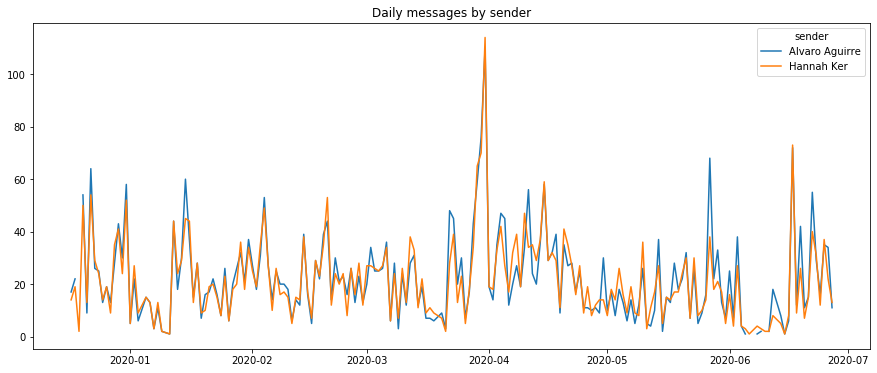

In [54]:
fig, ax = plt.subplots(figsize=(15,6))
txt.groupby([txt.index.date, 'sender']).count()['text'].unstack().plot(ax=ax);
plt.title("Daily messages by sender");

In [94]:
len(txt)

8296

In [95]:
# Function to separate text into Hannah and Alvaro
def who_is_this(x):
    return x.split()[0]

In [96]:
# Create set of people in the chat
alvaro = []
hannah = []
for i in range(len(txt)):
    if who_is_this(txt[i]).lower() == 'alvaro':
        alvaro.append(txt[i][16:len(txt[i])])
    elif who_is_this(txt[i]).lower() == 'hannah':
        hannah.append(txt[i][12:len(txt[i])])

KeyError: 0

In [ ]:
alvaro[1:10]

In [ ]:
hannah[1:10]

In [ ]:
print(len(alvaro))
print(len(hannah))

In [ ]:
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [ ]:
def top_10(x):
    x = ' '.join(x).lower().translate(str.maketrans('','', string.punctuation)).split()
    words = list(x)
    unique_words = set(list(x))
    unique_words = [a for a in unique_words if a not in stopwords]
    count = {}
    for word in unique_words:
        count[word] = words.count(word)
    top_words = sorted(count.items(), key = lambda x: x[1], reverse = True)
    return top_words

In [ ]:
top_10(alvaro)

In [ ]:
top_10(hannah)

In [ ]:
alvaro_length = []
for i in range(len(alvaro)):
    alvaro_length.append(len(alvaro[i].split(" ")))
    

hannah_length = []
for i in range(len(hannah)):
    hannah_length.append(len(hannah[i].split(" ")))

In [ ]:
import statistics as st
print(st.mean(alvaro_length))
print(st.mean(hannah_length))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(alvaro_length, bins = 20)
plt.show

In [ ]:
plt.hist(hannah_length, bins = 20)
plt.show